## Discriminator | multilayer perceptron

We use mnist dataset.

Assume that images of ONE are REAL(1), and those of SEVEN are FAKE(0).

We investigate whether a Discriminator can discriminate ONE from SEVEN.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/miokobayashii/summerschool2022/blob/main/day01/Discriminator01_NN.ipynb)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
#from keras.optimizers import Adam
from keras.optimizers import adam_v2

from tensorflow.keras.utils import plot_model

In [2]:
img_rows = 28
img_cols = 28
channels = 1

img_shape = (img_rows, img_cols, channels)    

In [38]:
def build_discriminator(img_shape):

    model = Sequential()

    # Flatten the input image
    model.add(Flatten(input_shape=img_shape))

    # Fully connected layer
    model.add(Dense(128))

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Output layer with sigmoid activation
    model.add(Dense(1, activation='sigmoid'))

    return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 201,217
Trainable params: 201,217
Non-trainable params: 0
_________________________________________________________________


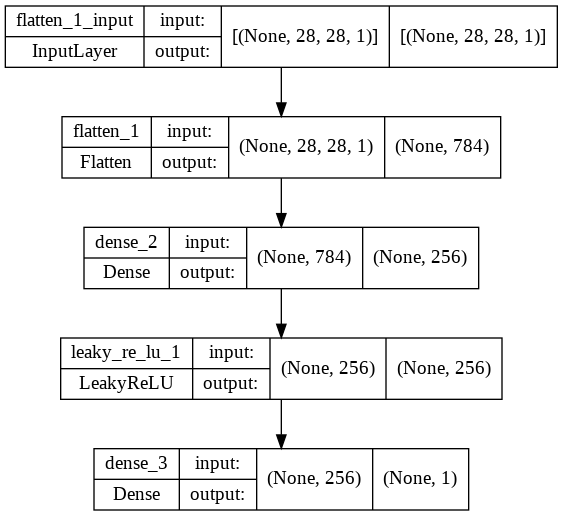

In [39]:
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=adam_v2.Adam(),
                      metrics=['accuracy'])
discriminator.summary()
plot_model(discriminator, to_file='model.png', show_shapes=True)


In [40]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
def show_img(img, figsize=(2,2)):
    fig = plt.figure(figsize=figsize,dpi=100)
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

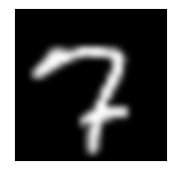

In [37]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
char = 7
X_test = X_test[np.where(y_test==char)]  

show_img(X_test[4])

In [41]:
losses = []
accuracies = []
iteration_checkpoints = []

def train(iterations, batch_size, sample_interval):

    # Load the MNIST dataset
    (X_train, _), (_, _) = mnist.load_data()

    char = 1 #True image
    X_train_1 = X_train[np.where(y_train==char)]    

    char = 7 #Fake image
    X_train_7 = X_train[np.where(y_train==char)]  

    # Rescale [0, 255] grayscale pixel values to [-1, 1]
    X_train_1 = X_train_1 / 127.5 - 1.0
    X_train_7 = X_train_7 / 127.5 - 1.0
   # X_train = np.expand_dims(X_train, axis=3)

    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Get a random batch of real images
        idx = np.random.randint(0, X_train_1.shape[0], batch_size)
        imgs = X_train_1[idx]

        # Get a random batch of fake images
        idx = np.random.randint(0, X_train_7.shape[0], batch_size)
        fake_img = X_train_7[idx]

        # Train Discriminator
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(fake_img , fake)
       # print(d_loss_real, d_loss_fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)


        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            #print("%d [D loss: %f] " %
            #      (iteration + 1, d_loss))
            print("%d [D loss: %f, acc.: %.2f%%] " %
                  (iteration + 1, d_loss, 100.0 * accuracy))

            # Output a sample of generated image
 

In [ ]:
discriminator.metrics_names

[]

In [42]:
# Set hyperparameters
iterations = 10
batch_size = 256
sample_interval = 1

# Train the Discriminator for the specified number of iterations
train(iterations, batch_size, sample_interval)

1 [D loss: 3.084740, acc.: 0.00%] 
2 [D loss: 0.969784, acc.: 51.17%] 
3 [D loss: 0.142557, acc.: 94.53%] 
4 [D loss: 0.127867, acc.: 98.24%] 
5 [D loss: 0.352499, acc.: 78.91%] 
6 [D loss: 0.255965, acc.: 90.23%] 
7 [D loss: 0.110955, acc.: 97.85%] 
8 [D loss: 0.120160, acc.: 96.29%] 
9 [D loss: 0.124841, acc.: 95.12%] 
10 [D loss: 0.117139, acc.: 95.90%] 


### Evaluation

In [43]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
char = 1 #True image: A label for 1 is "1"
X_test_1 = X_test[np.where(y_test==char)]    
y_test_1 = y_test[np.where(y_test==char)]  
y_test_1 = np.ones((y_test_1.shape[0], 1))

char = 7 #Fake image: A label for 7 is "0"
X_test_7 = X_test[np.where(y_test==char)]  
y_test_7 = y_test[np.where(y_test==char)]  
y_test_7 = np.zeros((y_test_7.shape[0], 1))

In [44]:
_, accuracy = discriminator.evaluate(X_test_1, y_test_1)
print("Training Accuracy: %.2f%%" % (100 * accuracy))

36/36 [==============================] - 0s 2ms/step - loss: 1.6174 - accuracy: 0.9868
Training Accuracy: 98.68%


In [45]:
_, accuracy = discriminator.evaluate(X_test_7, y_test_7)
print("Training Accuracy: %.2f%%" % (100 * accuracy))

33/33 [==============================] - 0s 2ms/step - loss: 2.4112 - accuracy: 0.9767
Training Accuracy: 97.67%


0 

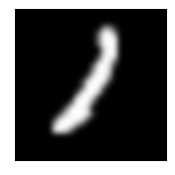

1 

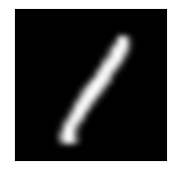

2 

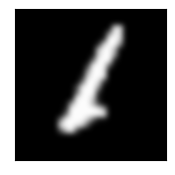

3 

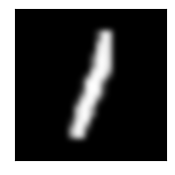

4 

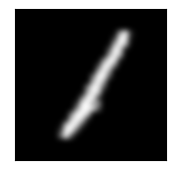

5 

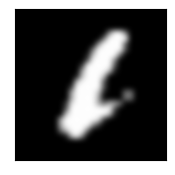

6 

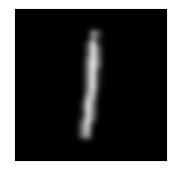

7 

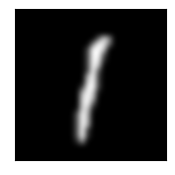

8 

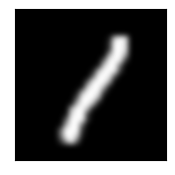

9 

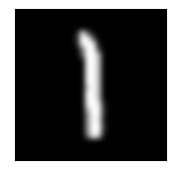

10 

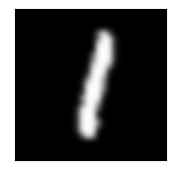

11 

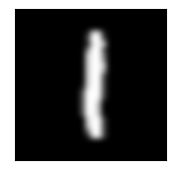

12 

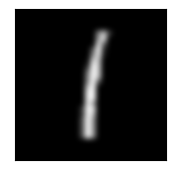

13 

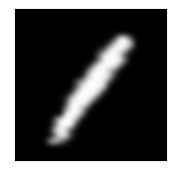

14 

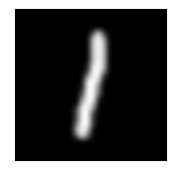

15 

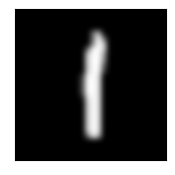

16 

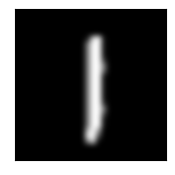

17 

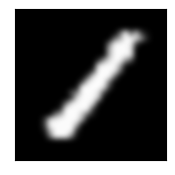

18 

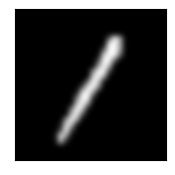

19 

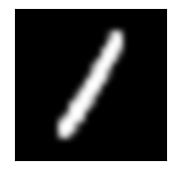

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(array([], dtype=int64), array([], dtype=int64))
0 

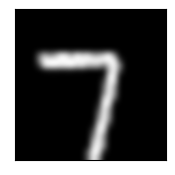

1 

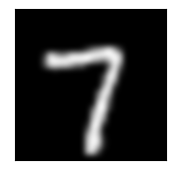

2 

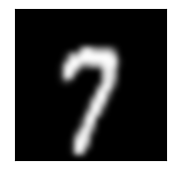

3 

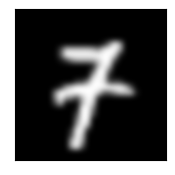

4 

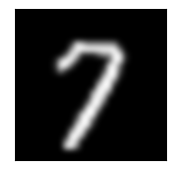

5 

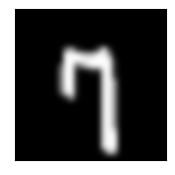

6 

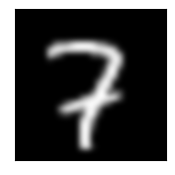

7 

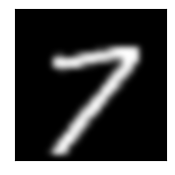

8 

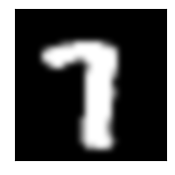

9 

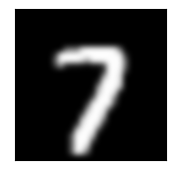

10 

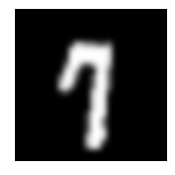

11 

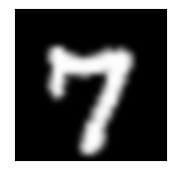

12 

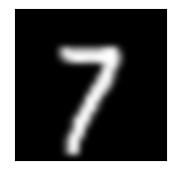

13 

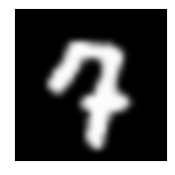

14 

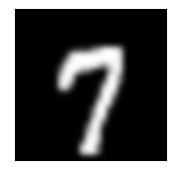

15 

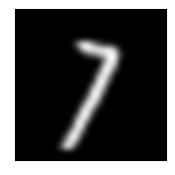

16 

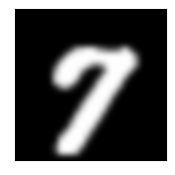

17 

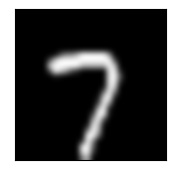

18 

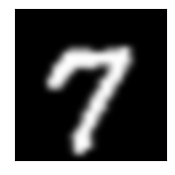

19 

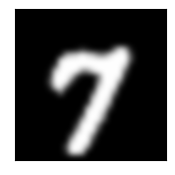

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
(array([], dtype=int64), array([], dtype=int64))


In [ ]:
#fake_img = np.zeros((batch_size, 28, 28)) -1
 #fake_img = np.random.normal(-1, 1, (batch_size, 28, 28))
(X_train, _), (X_test, _) = mnist.load_data()
char = 1 #True image
X_test_1 = X_test[np.where(y_test==char)]    

char = 7 #Fake image
X_test_7 = X_test[np.where(y_test==char)]  

test_size = 20

#### test 1: real image
idx = np.random.randint(0, X_test_1.shape[0], test_size)
imgs_1 = X_test_1[idx]

for i in range(test_size):
  print(i, end=" ")
  show_img(imgs_1[i])

y = discriminator.predict(imgs_1)
print(y)

false = np.where(y<=0.5)
print(false)


#### test 7: fake image
idx = np.random.randint(0, X_test_7.shape[0], test_size)
imgs_7 = X_test_7[idx]

for i in range(test_size):
  print(i, end=" ")
  show_img(imgs_7[i])

y = discriminator.predict(imgs_7)
print(y)

false = np.where(y>=0.5)
print(false)

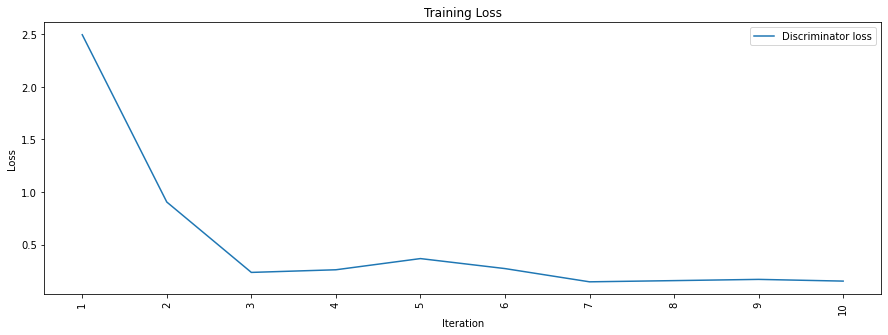

In [ ]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses, label="Discriminator loss")


plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()